In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [3]:
df = pd.read_csv('fcc-forum-pageviews.csv',index_col='date', parse_dates=True)

In [4]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [5]:
lower = df['value'].quantile(0.025)
upper = df['value'].quantile(0.975)

In [6]:
df = df[(df['value'] > lower) & (df['value'] < upper)]


In [7]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


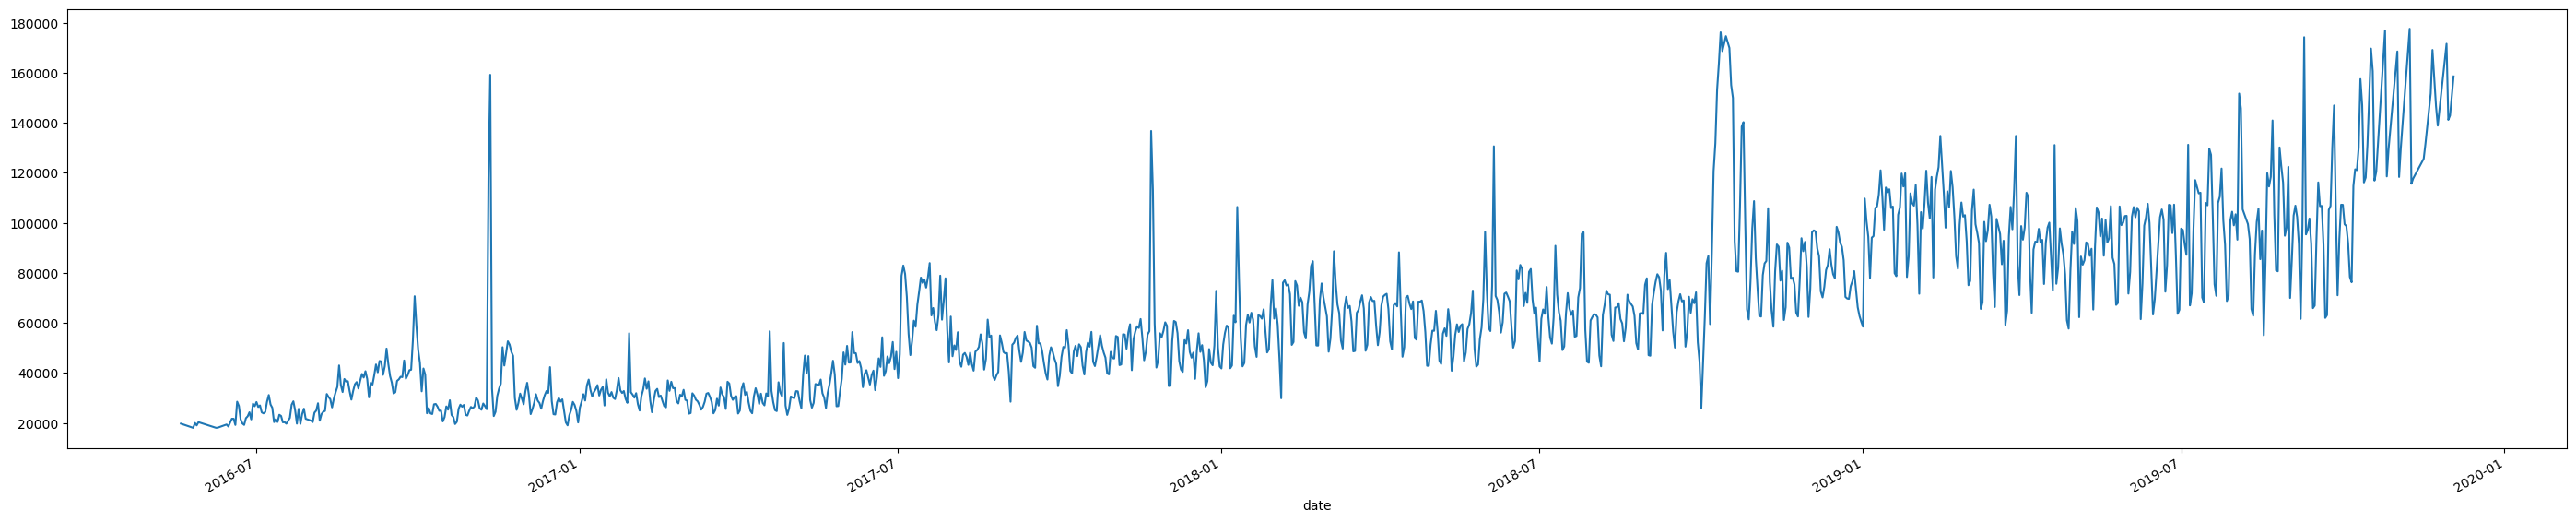

In [10]:
fig = df['value'].plot(kind='line', figsize=(35, 7))

# Save the plot to a file
plt.savefig('lineplot.png')  # Replace 'plot_filename.png' with your desired file name and extension


In [11]:
df['Year'] = df.index.year
df['Month'] = df.index.month

C:\Users\HP\AppData\Local\Temp\ipykernel_14228\2348180391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df.index.year
C:\Users\HP\AppData\Local\Temp\ipykernel_14228\2348180391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df.index.month


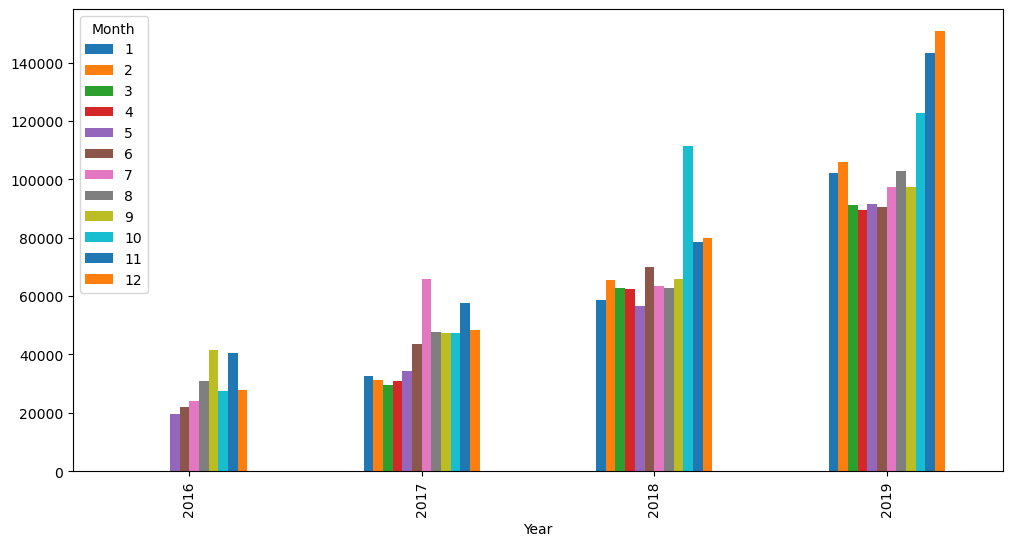

In [21]:
pivot_table = df.pivot_table(index='Year', columns='Month', values='value', aggfunc='mean')
ax = pivot_table.plot(kind='bar', figsize=(12,6))
fig = ax.get_figure()
fig.savefig('bar_plot.png')

In [23]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [24]:
df_box

,date,value,Year,Month,year,month
0,2016-05-19,19736,2016,5,2016,May
1,2016-05-26,18060,2016,5,2016,May
2,2016-05-27,19997,2016,5,2016,May
3,2016-05-28,19044,2016,5,2016,May
4,2016-05-29,20325,2016,5,2016,May
...,...,...,...,...,...,...
1233,2019-11-24,138875,2019,11,2019,Nov
1234,2019-11-29,171584,2019,11,2019,Nov
1235,2019-11-30,141161,2019,11,2019,Nov
1236,2019-12-01,142918,2019,12,2019,Dec


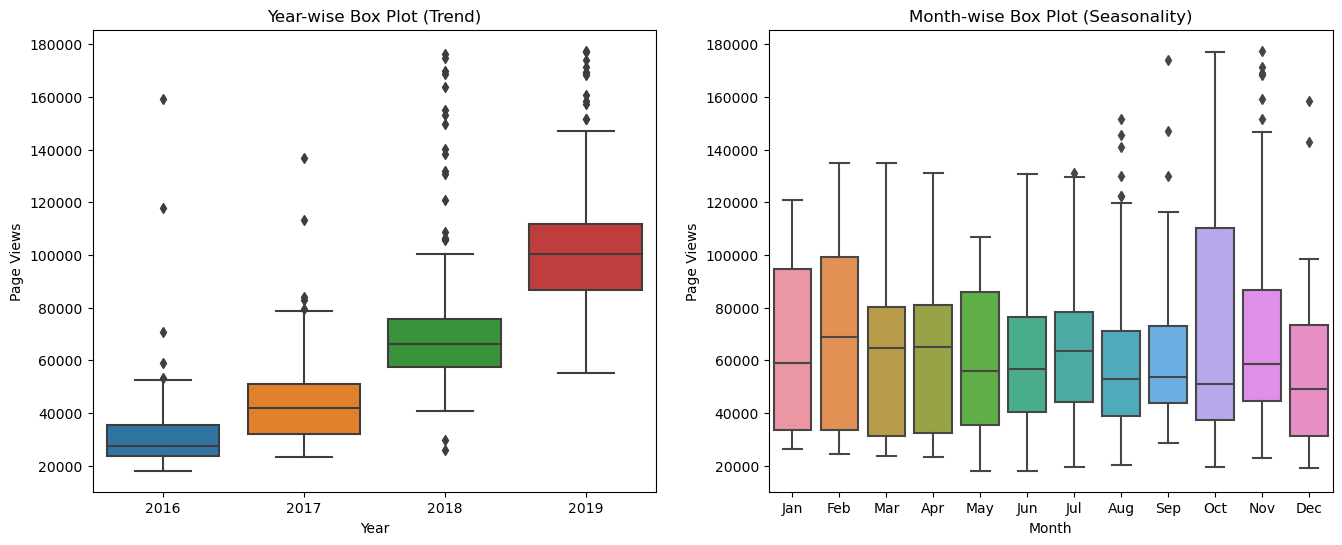

In [28]:
df_box['monthnumber'] = df.index.month
df_box = df_box.sort_values('monthnumber')
fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.boxplot(y = "value", x = "year", data = df_box, ax = ax[0] ) 
ax[0].set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
sns.boxplot(y = "value", x = "month", data = df_box, ax = ax[1])
ax[1].set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")
# Save image and return fig (don't change this part)
fig.savefig('box_plot.png')
                                    